## K-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Mall_Customers.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Dataset head (first five rows):



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df = df.dropna()


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.drop(["CustomerID"], axis = 1, inplace=True)

#### let's visualize the marginal distribution over each variable

1. pip3 uninstall seaborn
2. pip3 install seaborn
3. pip3 install seaborn -U

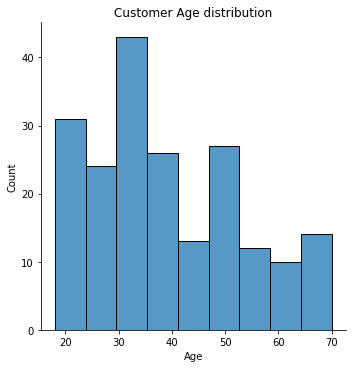

In [7]:
# # sns.distplot(df.Age)
sns.displot(df.Age)
_ = plt.title('Customer Age distribution')

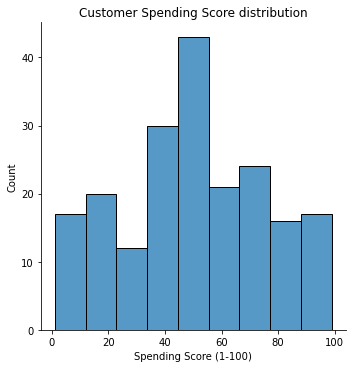

In [8]:
# # sns.distplot(df['Spending Score (1-100)'])
sns.displot(df['Spending Score (1-100)'])
_ = plt.title('Customer Spending Score distribution')

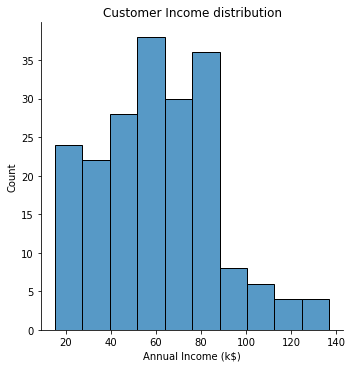

In [9]:
# # sns.distplot(df['Annual Income (k$)'])
sns.displot(df['Annual Income (k$)'])
_ = plt.title('Customer Income distribution')

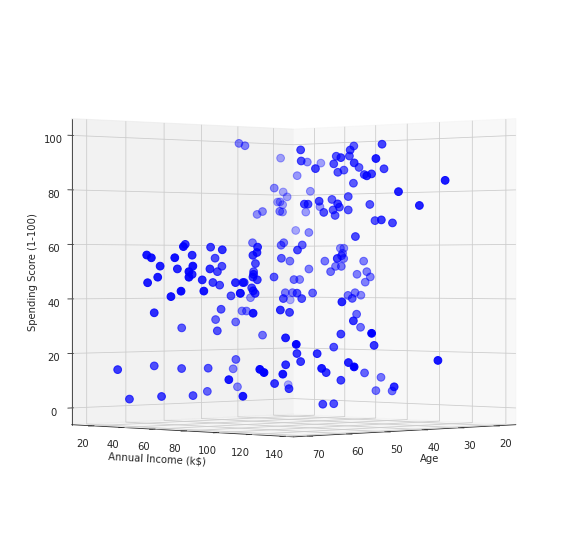

In [10]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c="blue", s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

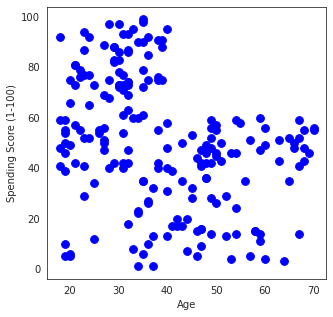

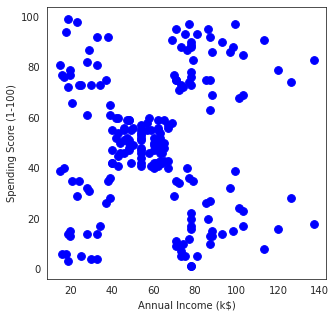

In [11]:
sns.set_style("white")
fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='2d')
plt.scatter(df.Age, df["Spending Score (1-100)"], c='blue', s=60)
# ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel('Spending Score (1-100)')
# ax.set_zlabel('Spending Score (1-100)')
plt.show()
sns.set_style("white")
fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='2d')
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
# ax.view_init(0, 45)
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
# ax.set_zlabel('Spending Score (1-100)')
plt.show()

#### Initialize a k-means model given a dataset

In [12]:
def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k] #only the first k samples
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means


#### Run one iteration of k-means

In [13]:
def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
#             print('dist j ',dist_j)
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
#                 print(j)
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

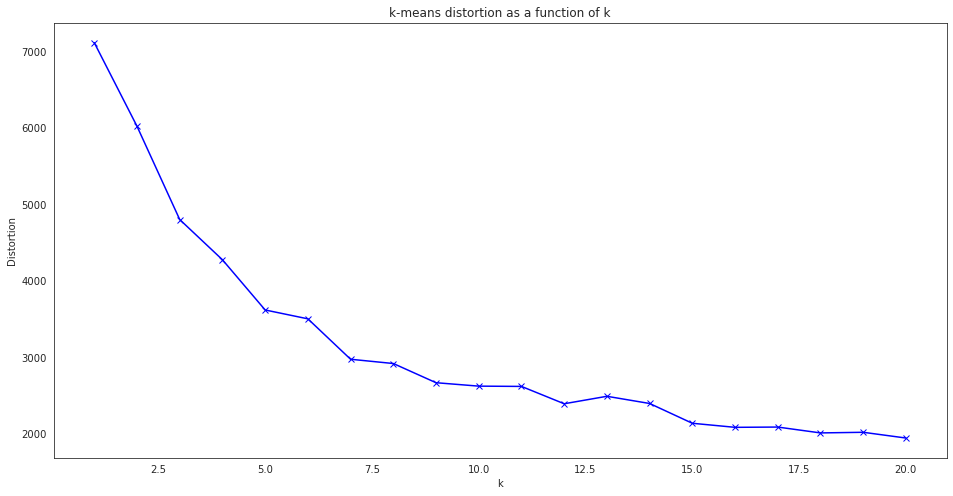

In [14]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
#         print('c ',c)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion
## WHAT IS c?
# Plot distortion as function of k

plt.figure(figsize=(16,8))  
plt.plot(range(1,max_k+1), distortions, 'bx-')
# plt.plot(range(1,max_k+1), distortion_k, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

# sudden increase, because of initialization ( initial cluster center is diffferent, its a cmpletely different arrangement not the existing cluster)

#### Select k

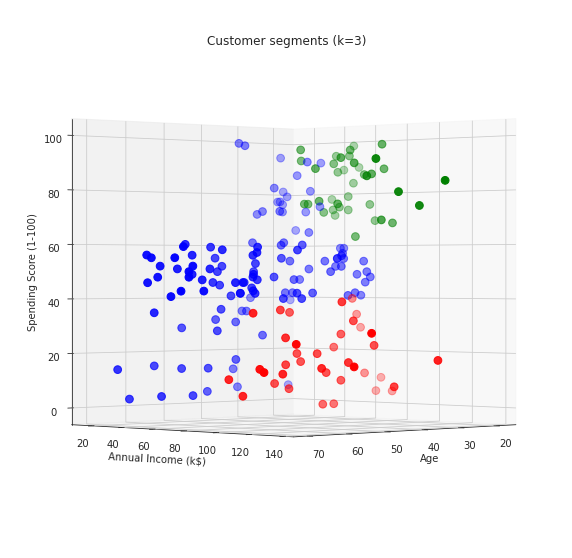

In [15]:
# Re-run k-means with k=3

k = 3
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

# For 5 clusters, you can uncomment the following two lines.

#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=3)')
plt.show()

In [16]:
print(means)

[[40.32520325 44.15447154 49.82926829]
 [40.39473684 87.         18.63157895]
 [32.69230769 86.53846154 82.12820513]]


#### Smoothening K

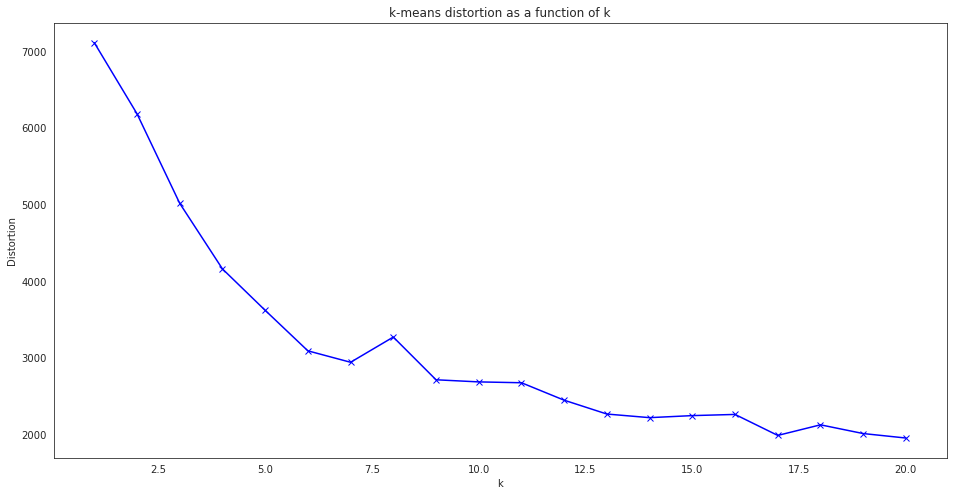

In [17]:
# Intialize hyperparameters

max_k = 20
epsilon = 0.001
iters = 30
# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
#     print(f"====== {k} ======")
    means = init_kmeans(X, k)
    for _ in range(1,iters+1):
        means, c, distortion = iterate_kmeans(X, means)
#         print('distortion',distortion)
        true_distortion = distortion
#         print('true distortion',true_distortion)
        prev_distortion = 0
        if distortion < true_distortion:
            true_distortion = distortion
        while True:
            if true_distortion > 0 and true_distortion - distortion < epsilon:
                break
    distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
# plt.plot(range(1,max_k+1), distortion_k, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

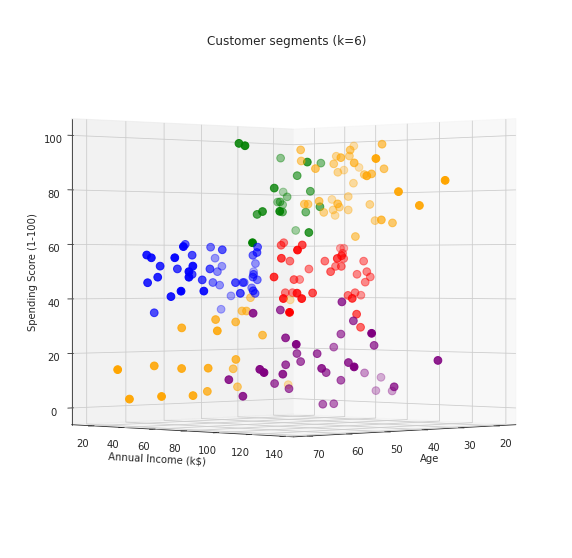

In [18]:
# Re-run k-means with k=3

k = 6
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='orange', s=60)
ax.scatter(df.Age[df.label == 6], df["Annual Income (k$)"][df.label == 6], df["Spending Score (1-100)"][df.label == 6], c='purple', s=60)

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=6)')
plt.show()